# Info/CS 4300: Language and Information - in-class demo

#Lecture 22

## Sentiment analysis 
### Discovering polarity lexicons from labeled data

In [1]:
%matplotlib inline

from __future__ import print_function
import json
from operator import itemgetter
from collections import defaultdict

import numpy as np
from matplotlib import pyplot as plt
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.naive_bayes import MultinomialNB


In [2]:
## loading movie review data: 
## http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

data = load_files('txt_sentoken')

## First review and first label:
print(data.data[0])
print(data.target[0])

arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is that wea

In [3]:
## Building the term document matrix using CountVectorizer
vec = CountVectorizer(min_df=50)
X = vec.fit_transform(data.data)
terms = vec.get_feature_names()
len(terms)

2153

In [30]:
X[data.target == 1].sum(axis=0).shape

(1, 2153)

In [39]:
## We estimate the positive_score as P(Positive|W)
def wordscore_pos():
    total_count = X.sum(axis=0)                 # (shape 1, n_terms)
    pos_count = X[data.target == 1].sum(axis=0) # shape (1, n_terms)
    
    # make sure they are 1d np.arrays
    total_count = np.asarray(total_count).ravel()
    pos_count = np.asarray(pos_count).ravel()
    
    prob = pos_count * 1.0 / total_count
    return zip(terms,prob)


In [37]:
## most "negative" words
negative_movies=sorted(wordscore_pos(), key=itemgetter(1), reverse=False)[:20]
negative_movies

[(u'lame', 0.13513513513513514),
 (u'wasted', 0.1440677966101695),
 (u'poorly', 0.14893617021276595),
 (u'waste', 0.15384615384615385),
 (u'ridiculous', 0.15714285714285714),
 (u'awful', 0.15909090909090909),
 (u'worst', 0.15909090909090909),
 (u'unfunny', 0.17045454545454544),
 (u'stupid', 0.17786561264822134),
 (u'dull', 0.17910447761194029),
 (u'painfully', 0.18333333333333332),
 (u'pointless', 0.18478260869565216),
 (u'laughable', 0.1891891891891892),
 (u'boring', 0.19259259259259259),
 (u'terrible', 0.19580419580419581),
 (u'embarrassing', 0.20000000000000001),
 (u'bland', 0.20238095238095238),
 (u'mess', 0.20754716981132076),
 (u'badly', 0.21052631578947367),
 (u'anywhere', 0.21818181818181817)]

In [38]:
positive_movies=sorted(wordscore_pos(),key = itemgetter(1),reverse = True)[:20]
positive_movies

[(u'outstanding', 0.93243243243243246),
 (u'wonderfully', 0.88235294117647056),
 (u'nomination', 0.83870967741935487),
 (u'era', 0.83720930232558144),
 (u'fantastic', 0.81818181818181823),
 (u'portrayal', 0.81609195402298851),
 (u'cameron', 0.81595092024539873),
 (u'jackie', 0.80918727915194344),
 (u'superb', 0.80645161290322576),
 (u'pulp', 0.80373831775700932),
 (u'memorable', 0.80272108843537415),
 (u'terrific', 0.80000000000000004),
 (u'political', 0.79870129870129869),
 (u'allows', 0.79347826086956519),
 (u'excellent', 0.79347826086956519),
 (u'satisfying', 0.79032258064516125),
 (u'wars', 0.78770949720670391),
 (u'contrast', 0.7846153846153846),
 (u'perfectly', 0.7831325301204819),
 (u'portrayed', 0.77777777777777779)]

In [9]:
dict(wordscore_pos())['voice']

0.65454545454545454

Now we can try to apply what we learned to a data without labels

In [42]:
## Loading the Kardashian data (from assingmnet 2)
with open("kardashian-transcripts.json", "rb") as f:
    transcripts = json.load(f)

In [43]:
msgs = [m['text'].lower() for transcript in transcripts
        for m in transcript if m['speaker'] == 'KIM']

In [44]:
classifier=MultinomialNB()
classifier.fit(X,data.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
## using the same transformation to get a term-document matrix (where terms match the ones in the movie-review data)
X2=vec.transform(msgs)
labels=classifier.predict(X2)

In [46]:
#Looking at the classes assigned by the classifier:
zip(labels,msgs)[:20]

[(0, u'you just need a duster.'),
 (0, u'when did you start to get gray hair?'),
 (0, u'oh, please.'),
 (0, u'oh, my god.'),
 (0, u'it is like $4,000.'),
 (0, u"that's crazy."),
 (0, u"that's way too much money, mom."),
 (0, u"you have so many dresses, and it's just a plain black dress."),
 (0, u"it's nothing special."),
 (0, u'capitol one, wells fargo...'),
 (0, u"so what's, like, your plan?"),
 (0, u'like, where are you gonna stay?'),
 (0, u"i'm just afraid if you go to new york, you'll come back hurt."),
 (1,
  u"as much as i don't agree with rob going to new york, he's my little brother."),
 (1, u"i'm gonna support him no matter what."),
 (1, u"so i call rob to see what's going on with adrienne."),
 (1, u"rob, you're crazy."),
 (1,
  u"i know he feels that she's the one, and i get it, but rob is taking it to a whole 'nother level."),
 (0, u'i think that at some point, you just need to stop calling her.'),
 (0, u'and i think this is now, like, the turning point.')]

(array([ 4911.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   954.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

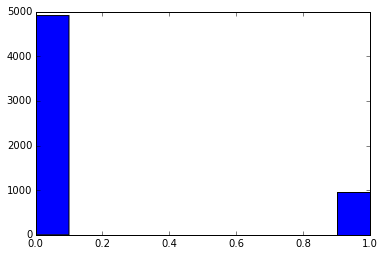

In [47]:
# label distribution (everything has an assigned class, even though not everything might be subjective)
plt.hist(labels.tolist())

In [56]:
## We can look at the predicted class probabilities
label_prob = classifier.predict_proba(X2)
positive_label_probabilities = label_prob[:, 1]

In [55]:
classifier.classes_

array([0, 1])

In [58]:
## documents that are considered most negative
sorted(set(zip(positive_label_probabilities, msgs)),
       key=itemgetter(0),
       reverse=False)[:20]

[(0.00019273406884585592,
  u"i know that you guys sometimes don't understand what goes on, and i'm sorry if, you know, at school, maybe your friends have said things to you or... come to you with things that maybe you don't know the whole truth about, but you have three big sisters that you can always come to, and when you get to that point and you do like boys, i want you to be able to call me and tell me whatever you want to."),
 (0.0015970813143444077,
  u"i've had time to reflect on what my family's trying to say to me, and it probably wouldn't be such a bad idea if i put myself on a budget i just don't like lying to you guys, and i'm really sorry."),
 (0.0018022656570855005,
  u'this was supposed to be me!" like, i think, you know, like, what if i have a nervous breakdown when they\'re like, "does anyone object?" what if i\'m, like, "this was supposed to be me!" like in a dream.'),
 (0.0035369644414546429,
  u"you don't know when you're wrong, and that's probably why you and adri

We see that the polarity lexicon does not generalize well from one dataset to another. In the next lecture we'll see how to address this problem.